# Minimos cuadrados lineales - Descomposicion QR

En el problema de mínimos cuadrados lineales, dada una matriz $A$ y un vector $b$ (que dependen de los datos), debemos resolver:

$$\min_\theta \|b-A\theta\|^2.$$

Como vimos anteriormente, la solución de lo anterior está dada por las **ecuaciones normales**:

$$A^T A \theta = A^T b.$$

Este sistema se puede resolver escalerizando. Sin embargo, la matriz del sistema $A^T A$ puede presentar problemas numéricos.

## Número de condición de una matriz

El **número de condición** de una matriz es una medida de cómo se propagan los errores al aplicar la matriz a un vector cualquiera. Veremos que al resolver *numéricamente* un sistema lineal, el no. de condición determina cuánta confianza podemos tener en la solución.

### Norma de una matriz

> **Definición:** La norma de una matriz $\|A\|$ se define como:
>
> $$\|A\| = \sup_{u\neq 0} \frac{\|Au\|}{\|u\|}.$$

Es decir, $\|A\|$ es una medida de cuánto amplifica una matriz en el peor caso. El vector $u$ que alcanza el maximo es la dirección que más amplifica.

De la definición anterior se tiene la siguiente cota. Si $A$ es una matriz $m\times n$ entonces:

$$\| A x \| \leqslant \|A\|\|x\| \quad \forall x\in \mathbb{R}^n.$$

Usemos ahora esta cota para hallar una cota del error cometido al resolver un sistema lineal.

### Cota del error en un sistema lineal

Supongamos que tenemos el sistema lineal $Ax=b$ con $A$ de $n\times n$ invertible (es decir, el sistema es compatible determinado). Sea $x$ la solución.

Supongamos que el vector $b$ se conoce con un error $\delta b$, al resolver el sistema:

$$ A \tilde{x} = b+\delta b$$

hallaremos una solución $\tilde{x}=x+\delta x$ con un cierto error. Se desea acotar el mismo.


Observemos que el error verifica:

$$A\tilde{x} = b+\delta b \Rightarrow A(x+\delta x) = b + \delta b \Rightarrow A\delta x = \delta b.$$

De donde $\delta x = A^{-1}\delta b$. Usando la cota anterior tenemos:

$$\|\delta x\| \leqslant \|A^{-1}\| \|\delta b\|.$$

A su vez:

$$Ax = b \Rightarrow \|b\| \leqslant \|A\|\|x\|.$$

Multiplicando ambas desigualdades se tiene que:

$$\|\delta x\| \|b\| \leqslant \|A\| \|A^{-1}\| \|x\|\|\delta b\|,$$

o bien:

$$\frac{\|\delta x\|}{\|x\|} \leqslant \|A\| \|A^{-1}\|\frac{\|\delta b\|}{\|b\|}$$

Es decir, el error relativo en la solución se amplifica tanto como $\|A\|\|A^{-1}\|$.


> **Definición:** Dada una matriz $A$ de $n\times n$ invertible, se define el **número de condición** de $A$ como:
>
> $$\textrm{cond}(A) = \|A\|\|A^{-1}\|$$.


### Ejemplos:

* Si $A=Id$, entonces $\textrm{cond}(A) = 1$.
* Si $A$ simétrica, entonces $\textrm{cond}(A) = \lambda_{max}/\lambda_{min}$.
* En general, si las columnas de $A$ están "cerca" de ser linealmente dependientes, el no. de condición se vuelve grande. 

In [1]:
using LinearAlgebra

# Ejemplo de no. de condición: cuando epsilon se acerca a 1, la matriz es no invertible.
n=3;

Id=Matrix(I, 3, 3)
epsilon = 0.999999999;
M = ones(n,n) - Id;


A = Id + epsilon*M

println("No. de condicion: $(cond(A))")
A

No. de condicion: 3.0000011023786316e9


3×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

### Número de condición y ecuaciones normales.

Si $A$ no es cuadrada, también se define su no. de condición y se verifica que:

$$ \textrm{cond}(A^T A) = \textrm{cond}(A)^2 $$.

Es decir, si el número de condición de $A$ es grande, el mismo se ve amplificado al hacer la operación $A^T A$. Por lo tanto, las ecuaciones normales tendrán un no. de condición alto y son propensas a errores numéricos.

### Ejemplo: matriz de Vandermonde

Dado un vector $x=(x_1,\ldots,x_m)$ la matriz de Vandermonde es la que surge de realizar el ajuste a un polinomio:

$$A=\left(\begin{array}{cccc} 1 & x_1 & \ldots & x_1^p \\ 1 & x_2 & \ldots & x_2^p  \\ \vdots & \vdots & \ddots &\vdots \\ 1 & x_m & \ldots & x_m^p  \end{array}\right).$$

In [2]:
#No.de condicion de la matriz de Vandermonde

x=collect(1:1:100)

A=ones(size(x));
p=5;

for i=1:p
    
    A=[A x.^i]
    
end

println("No de condicion de A: $(cond(A))")
A


No de condicion de A: 2.065164074052632e10


100×6 Array{Float64,2}:
 1.0    1.0      1.0       1.0        1.0             1.0
 1.0    2.0      4.0       8.0       16.0            32.0
 1.0    3.0      9.0      27.0       81.0           243.0
 1.0    4.0     16.0      64.0      256.0          1024.0
 1.0    5.0     25.0     125.0      625.0          3125.0
 1.0    6.0     36.0     216.0     1296.0          7776.0
 1.0    7.0     49.0     343.0     2401.0         16807.0
 1.0    8.0     64.0     512.0     4096.0         32768.0
 1.0    9.0     81.0     729.0     6561.0         59049.0
 1.0   10.0    100.0    1000.0    10000.0        100000.0
 1.0   11.0    121.0    1331.0    14641.0        161051.0
 1.0   12.0    144.0    1728.0    20736.0        248832.0
 1.0   13.0    169.0    2197.0    28561.0        371293.0
 ⋮                                                    ⋮
 1.0   89.0   7921.0  704969.0        6.27422e7       5.58406e9
 1.0   90.0   8100.0  729000.0        6.561e7         5.9049e9
 1.0   91.0   8281.0  753571.0        6

## Descomposicion QR

La descomposición QR de una matriz permite obtener una representación de la misma más manejable a la hora de resolver las ecuaciones normales.

> **Proposición:** Dada una matriz $A$ de $m\times n$, existen dos matrices $Q$ y $R$ tales que:
>
>  $$ A = QR $$
>
> donde $Q$ es de $m\times n$ y es ortogonal, es decir $Q^T Q = Id$. La matriz $R$ es $n\times n$ y es triangular superior. Si las columnas de A son linealmente independientes, la matriz $R$ es además invertible.



### Construcción de Q y R

Para construir Q y R, se utiliza el *método de ortogonalización de Gram-Schmidt*.

**Idea:** Se considera el subespacio de $\mathbb{R}^m$ generado por las columnas de $A$. Las columnas de $Q$ serán una *base ortonormal* de dicho subespacio, construida a partir de las columnas de $A$. Las entradas de $R$ son las coordenadas de las columnas de $A$ en esa base.

**Construcción:** Si $a_1,\ldots,a_n$ son las columnas de $A$, se definen las columnas de $Q$ recursivamente como:

$$ q_k = \frac{a_k - \sum_{i=1}^{k-1} <a_i,q_i> q_i}{\|a_k - \sum_{i=1}^{k-1} <a_i,q_i> q_i\|}.$$

**Observación:**

$$a_k = \sum_{i=1}^{k-1} <a_i,q_i> q_i + \|q_k\| q_k.$$

Por lo tanto, la columna $k$ de $A$ solo tiene coordenadas en las primeras $k$ columnas de $Q$. Esto es lo que produce que $R$ sea triangular superior.

En Julia, se puede obtener la descomposición simplemente haciendo `Q,R = qr(A)`.

In [3]:
A=[1 1;1 2;1 3]
Q,R=qr(A)

#Q es un objeto de tipo QR del que se extrae la matriz Q m x n adecuada.
#R es directo una matriz triangular superior con dimendión igual a las columnas de A.

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
3×3 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.57735   0.707107      0.408248
 -0.57735   1.11022e-16  -0.816497
 -0.57735  -0.707107      0.408248
R factor:
2×2 Array{Float64,2}:
 -1.73205  -3.4641
  0.0      -1.41421

### Aplicación de las descomposición a las ecuaciones normales

Se desea resolver:

$$A^T A \theta = A^T b.$$

Sustituyendo $A=QR$ queda:

$$(QR)^T QR \theta = (QR)^T b \Leftrightarrow R^T Q^T Q R \theta = R^T Q^T b.$$

Usando que $Q^TQ = Id$ y que $R$ es invertible:

$$R^T Q^T Q R \theta = R^T Q^T b \Leftrightarrow R^T R \theta = R^T Q^T b \Leftrightarrow R\theta = Q^Tb.$$



### Ecuaciones normales QR

Las ecuaciones normales en QR son entonces:

$$R\theta = Q^T b.$$

La ventaja aquí es que $R$ es triangular superior (por lo que no necesita escalerización) y además $\textrm{cond}(R) = \textrm{cond}(A)$, por lo que no hay amplificación de errores.

## Ejercicio

1. Adaptar la funcion `ajuste(x,y,n)` de la clase anterior para que utilice la descomposición QR a la hora de ajustar un polinomio de grado $n$ a los datos $x,y$.

2. Para los datos $x,y$ dados a continuación, calcular los coeficientes del ajuste para $n=10$ usando ambas funciones y observar las diferencias. Comparar los nos. de condición de $A$ y $A^TA$ utilizados. ¿Cuál método es entonces más confiable?

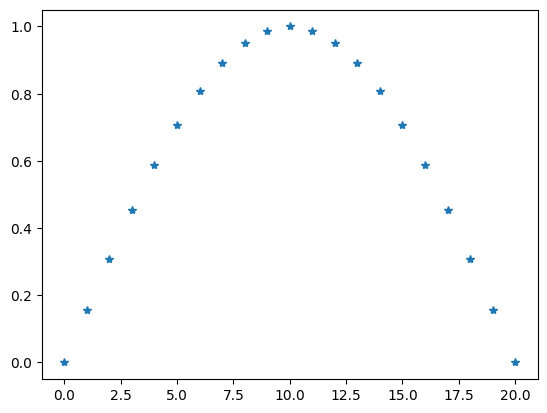

In [4]:
using PyPlot

x=collect(0:20)
y=sin.(2*pi*x/40)

plot(x,y,"*");